## 1. Carga de Datos

##### Se utiliza el conjunto de datos de flores Iris con sus atributos: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

In [1]:
import pandas as pd

# Carga el conjunto de datos Iris
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Muestra las primeras filas del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2. Exploración de Datos

##### Se crea una matriz de gráficos de dispersión para visualizar las relaciones entre las características del dataset.

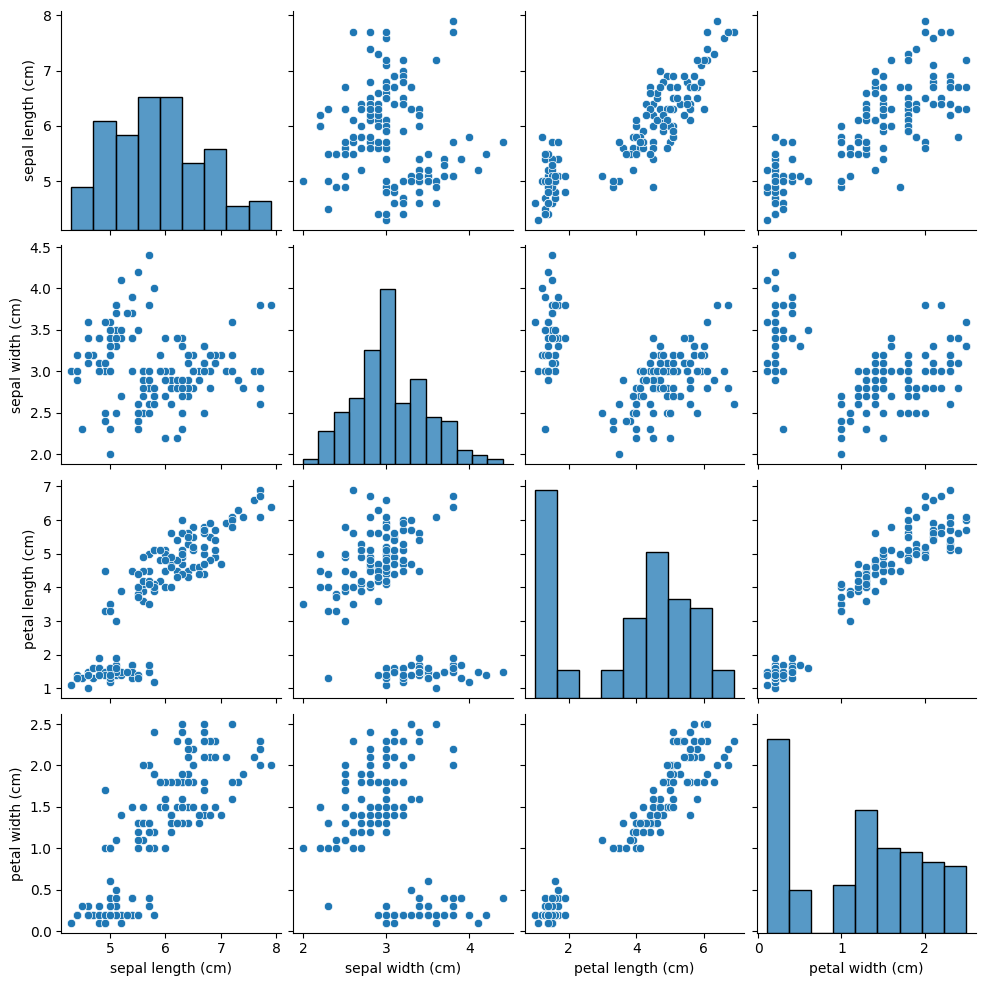

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de las características
sns.pairplot(df)
plt.show()


## 3. Implementación de DBSCAN

##### Se aplica el algoritmo para realizar el clustering. Se utilizan los parámetros eps=0.5 y min_samples=5, es decir, un radio de vecindad de 0.5, y la cantidad mínima de 5 puntos para pertenecer a un radio. Finalmente se obtienen las etiquetas de los clusteres para cada punto.

In [3]:
from sklearn.cluster import DBSCAN

# Ajusta los hiperparámetros eps (radio máximo de la vecindad de un punto) y min_samples (min de puntos dentro del radio)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df)


## 4. Visualización

##### Se crea una matriz de gráficos de dispersión para visualizar los clusteres identificados por DBSCAN.

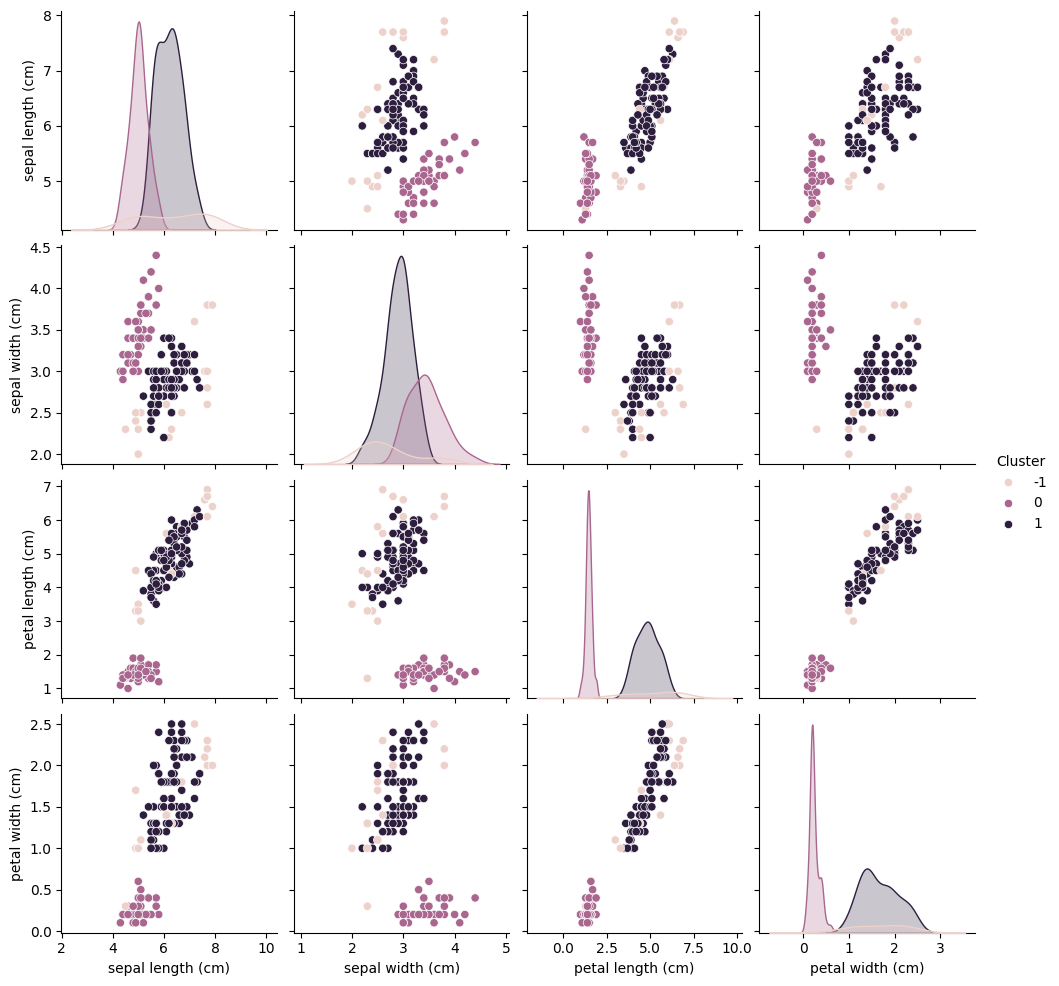

In [4]:
# Agrega la columna de clusters al DataFrame
df['Cluster'] = clusters

# Visualización de los clusters
sns.pairplot(df, hue='Cluster')
plt.show()


## 5. Interpretación

##### Se calcula la cantidad de clusteres identificados, excluyendo el cluster de puntos ruidosos (-1).

In [5]:
# Número de clusters y puntos ruidosos
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Número de clusters: {n_clusters}')
print(f'Número de puntos ruidosos: {n_noise}')

Número de clusters: 2
Número de puntos ruidosos: 17
